#Imports

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.xls to kc_house_data.xls
Saving car_price.xls to car_price.xls


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
df_house = pd.read_csv('kc_house_data.xls')
df_car = pd.read_csv('car_price.xls')

In [ ]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


#1

Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

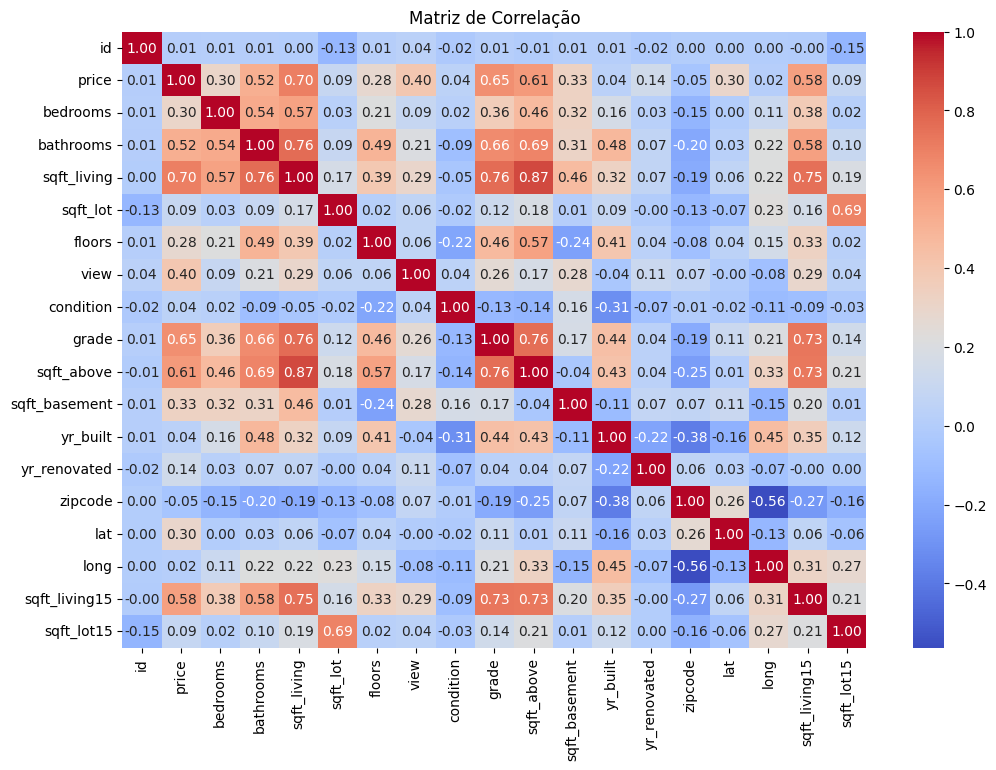

In [ ]:
correlation_matrix = df_house.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_house.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
corr_price_bedrooms = df_house['price'].corr(df_house['bedrooms'])
print(f"Correlação entre preço e número de quartos: {corr_price_bedrooms:.2f}")

Correlação entre preço e número de quartos: 0.30


In [ ]:
filtered_df = df_house[df_house['sqft_living'] > 2000]
corr_filtered = filtered_df['price'].corr(filtered_df['bedrooms'])
print(f"Correlação (apenas casas com sqft_living > 2000): {corr_filtered:.2f}")

Correlação (apenas casas com sqft_living > 2000): 0.12


#2

Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [ ]:
filtered_bathrooms = df_house[df_house['bathrooms'] >= 2]
corr_price_sqft_living = filtered_bathrooms['price'].corr(filtered_bathrooms['sqft_living'])
print(f"Correlação entre preço e área total (considerando casas com pelo menos 2 banheiros): {corr_price_sqft_living:.2f}")

Correlação entre preço e área total (considerando casas com pelo menos 2 banheiros): 0.71


#3

Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [ ]:
df_filtered = df_house.groupby('bathrooms').filter(lambda x: len(x) > 1)

corr_by_bathrooms = df_filtered.groupby('bathrooms').agg(
    correlation=('price', lambda x: x.corr(df_filtered.loc[x.index, 'sqft_living']))
).reset_index()

corr_by_bathrooms['correlation'] = corr_by_bathrooms['correlation'].round(2)

print("Correlação entre Preço e Área Total por Número de Banheiros:")
print(corr_by_bathrooms)

Correlação entre Preço e Área Total por Número de Banheiros:
    bathrooms  correlation
0        0.00         0.92
1        0.75         0.36
2        1.00         0.36
3        1.25         0.17
4        1.50         0.42
5        1.75         0.45
6        2.00         0.45
7        2.25         0.60
8        2.50         0.56
9        2.75         0.52
10       3.00         0.57
11       3.25         0.54
12       3.50         0.57
13       3.75         0.47
14       4.00         0.58
15       4.25         0.44
16       4.50         0.80
17       4.75         0.65
18       5.00         0.75
19       5.25         0.90
20       5.50         0.41
21       5.75         1.00
22       6.00         1.00
23       6.75         1.00


#4

Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

In [ ]:
large_houses = df_house[df_house['sqft_living'] > 3000]

avg_price_by_condition = large_houses.groupby('condition')['price'].mean()
avg_price_by_condition = avg_price_by_condition.round(2)

print('Média de preço por condição da casa (Área total superior a 3000 pés²):')
print(avg_price_by_condition)

Média de preço por condição da casa (Área total superior a 3000 pés²):
condition
2     715000.00
3    1016931.70
4    1087103.58
5    1292892.57
Name: price, dtype: float64


#5

Existe alguma correlação entre a localização geográca lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
houses_with_3_or_more_bathrooms = df_house[df_house['bedrooms'] >= 3]
corr_lat_price = houses_with_3_or_more_bathrooms['lat'].corr(houses_with_3_or_more_bathrooms['price'])
corr_long_price = houses_with_3_or_more_bathrooms['long'].corr(houses_with_3_or_more_bathrooms['price'])

print(f'Correlação entre Latitude e Preço: {corr_lat_price:.2f}')
print(f'Correlação entre Longitude e Preço: {corr_long_price:.2f}')

Correlação entre Latitude e Preço: 0.31
Correlação entre Longitude e Preço: -0.01


#6

Calcule a correlação entre uma variável categórica (waterfront) e uma
variável numérica(price) usando ANOVA.

In [ ]:
houses_with_waterfront = df_house[df_house['waterfront'] == 'y']['price']
houses_without_waterfront = df_house[df_house['waterfront'] == 'n']['price']

f_value, p_value = stats.f_oneway(houses_with_waterfront, houses_without_waterfront)

print(f"Valor de F: {f_value:.2f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("A diferença nos preços entre casas com e sem vista para a água é estatisticamente significativa.")
else:
    print("A diferença nos preços entre casas com e sem vista para a água não é estatisticamente significativa.")


Valor de F: 964.57
P-valor: 0.0000
A diferença nos preços entre casas com e sem vista para a água é estatisticamente significativa.


#7

Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.

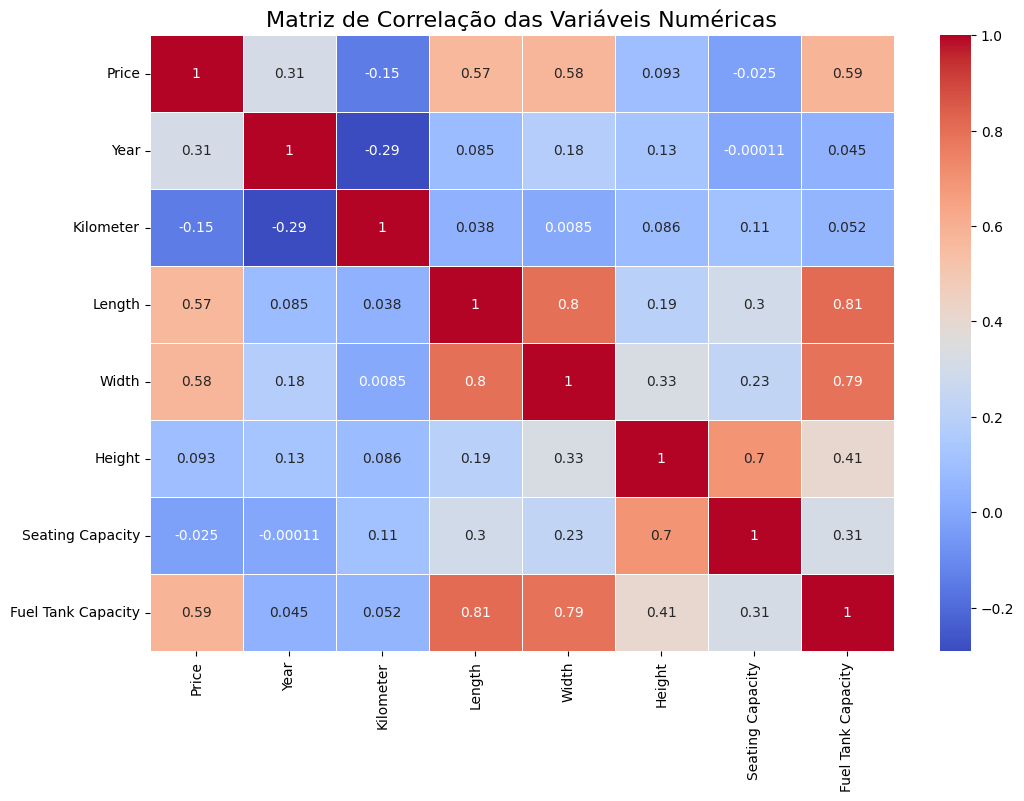

In [ ]:
numeric_columns = df_car.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_car[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

In [ ]:
positive_corr = corr_matrix[corr_matrix > 0.5]
negative_corr = corr_matrix[corr_matrix < -0.5]
neutral_corr = corr_matrix[(corr_matrix >= -0.5) & (corr_matrix <= 0.5)]

print("Exemplos de correlação positiva:")
print(positive_corr)

print("\nExemplos de correlação negativa:")
print(negative_corr)

print("\nExemplos de correlação neutra:")
print(neutral_corr)

Exemplos de correlação positiva:
                       Price  Year  Kilometer    Length     Width    Height  \
Price               1.000000   NaN        NaN  0.568875  0.577100       NaN   
Year                     NaN   1.0        NaN       NaN       NaN       NaN   
Kilometer                NaN   NaN        1.0       NaN       NaN       NaN   
Length              0.568875   NaN        NaN  1.000000  0.797228       NaN   
Width               0.577100   NaN        NaN  0.797228  1.000000       NaN   
Height                   NaN   NaN        NaN       NaN       NaN  1.000000   
Seating Capacity         NaN   NaN        NaN       NaN       NaN  0.695373   
Fuel Tank Capacity  0.586109   NaN        NaN  0.809812  0.791316       NaN   

                    Seating Capacity  Fuel Tank Capacity  
Price                            NaN            0.586109  
Year                             NaN                 NaN  
Kilometer                        NaN                 NaN  
Length             

#8

Codifique e exiba Grácos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price

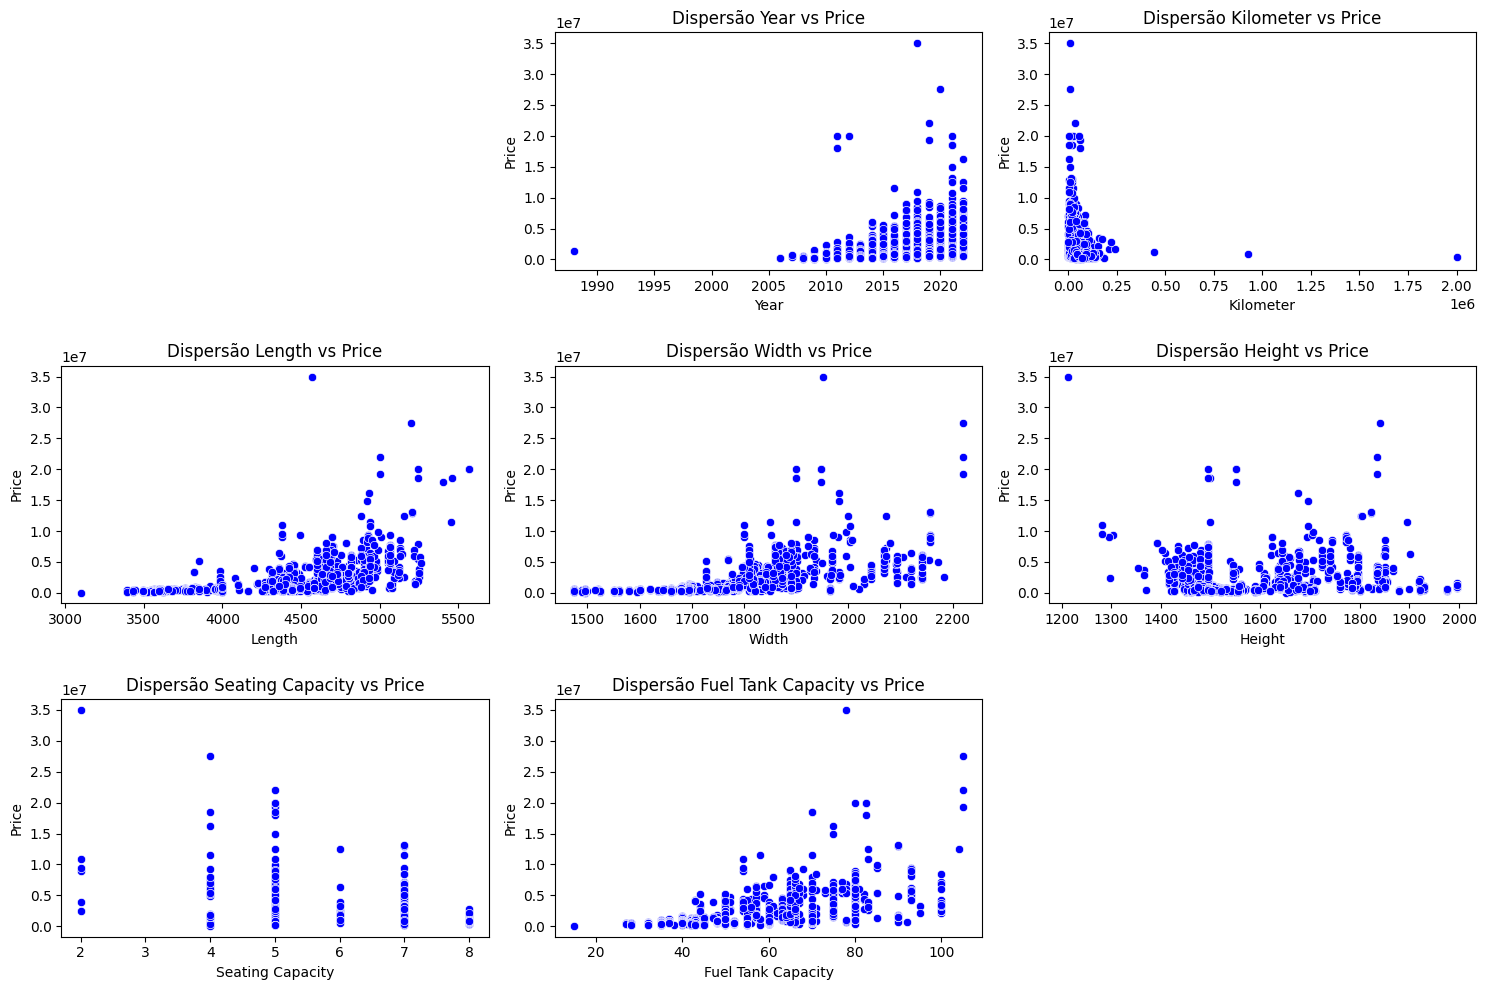

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
  if column != 'Price':
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df_car[column], y=df_car['Price'], color='blue')
    plt.title(f'Dispersão {column} vs Price', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Price', fontsize=10)

plt.tight_layout()
plt.show()

#9

Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.

In [ ]:
X = df_car[['Kilometer']]
y = df_car['Price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     41.50
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.49e-10
Time:                        05:46:09   Log-Likelihood:                -30189.
No. Observations:                1874   AIC:                         6.038e+04
Df Residuals:                    1872   BIC:                         6.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.041e+06   7.48e+04     27.302      0.0

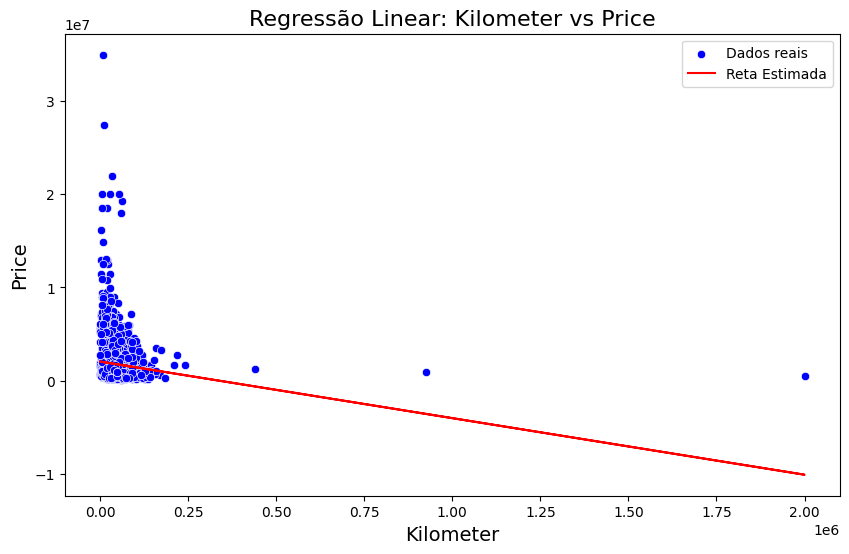

In [ ]:
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_car['Kilometer'], y=df_car['Price'], color='blue', label='Dados reais')
plt.plot(df_car['Kilometer'], y_pred, color='red', label='Reta Estimada')
plt.title('Regressão Linear: Kilometer vs Price', fontsize=16)
plt.xlabel('Kilometer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show()

#10

Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.

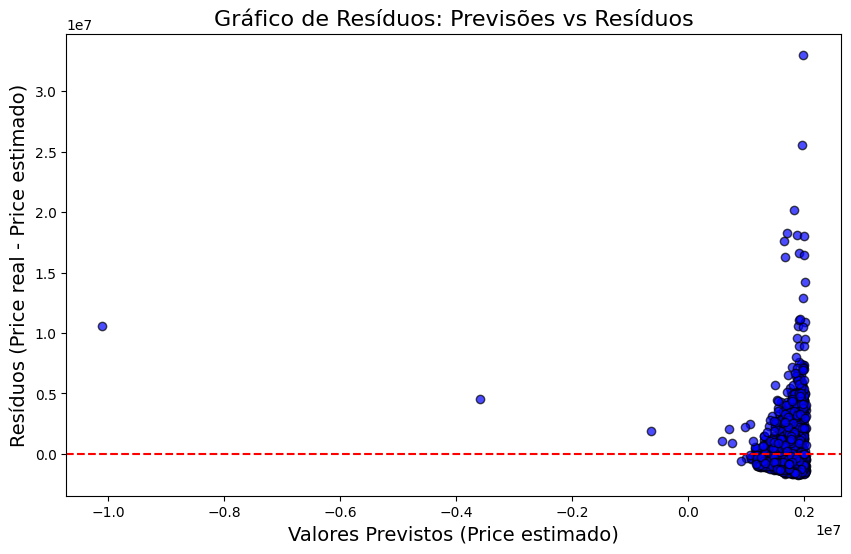

In [ ]:
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal no zero para visualização
plt.title('Gráfico de Resíduos: Previsões vs Resíduos', fontsize=16)
plt.xlabel('Valores Previstos (Price estimado)', fontsize=14)
plt.ylabel('Resíduos (Price real - Price estimado)', fontsize=14)
plt.show()

#11

Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráco dos resíduos do modelo.

In [ ]:
X = df_car[['Kilometer', 'Year', 'Engine', 'Fuel Tank Capacity', 'Length', 'Width']]
y = df_car['Price']

X['Engine'] = X['Engine'].str.extract('(\d+)').astype(float)
X = X.apply(pd.to_numeric, errors='coerce')

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     317.8
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          5.23e-281
Time:                        05:53:03   Log-Likelihood:                -29550.
No. Observations:                1874   AIC:                         5.911e+04
Df Residuals:                    1867   BIC:                         5.915e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.112e+08   2.75

<ipython-input-154-dd1acf5a670a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Engine'] = X['Engine'].str.extract('(\d+)').astype(float)


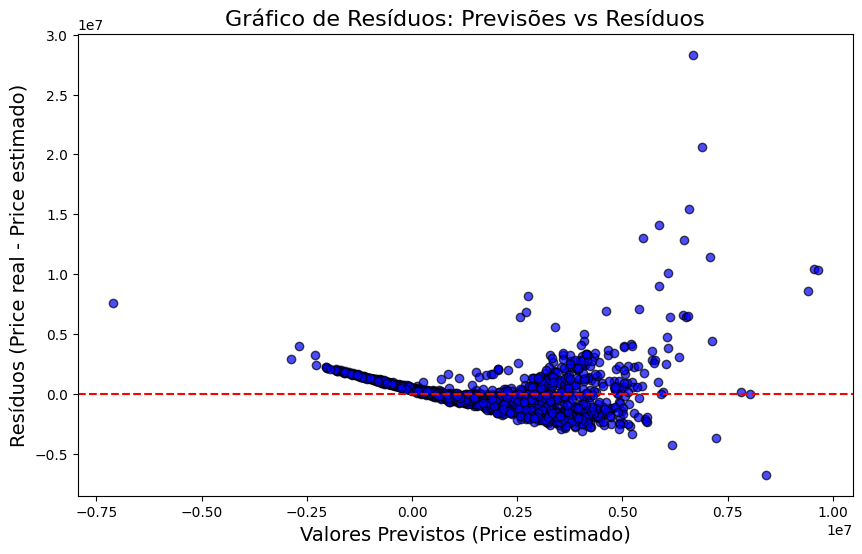

In [ ]:
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos: Previsões vs Resíduos', fontsize=16)
plt.xlabel('Valores Previstos (Price estimado)', fontsize=14)
plt.ylabel('Resíduos (Price real - Price estimado)', fontsize=14)
plt.show()